# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

# 忽略警告
warnings.filterwarnings("ignore")

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [61]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### matplotlib

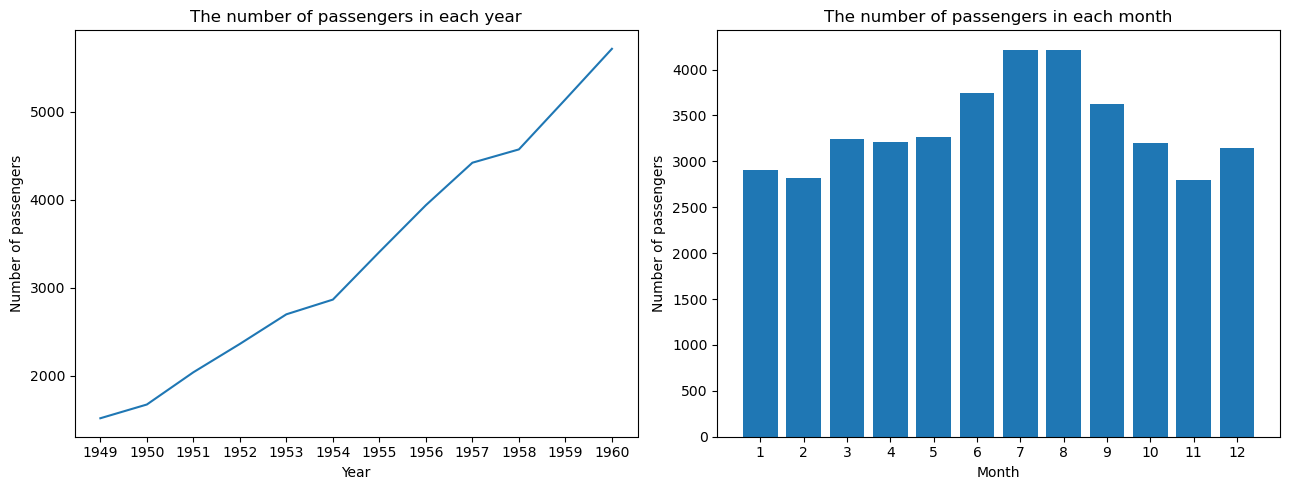

In [62]:
data1 = data.groupby("year").agg({"passengers": "sum"}) 
data2 = data.groupby("month").agg({"passengers": "sum"}) 

# Initialize a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot the yearly data
ax[0].plot(data1.index, data1["passengers"], linestyle='-')
ax[0].set_title('The number of passengers in each year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of passengers')
ax[0].set_xticks(data1.index)

# Plot the monthly data
ax[1].bar(data2.index, data2['passengers'])
ax[1].set_title('The number of passengers in each month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of passengers')
ax[1].set_xticks(data2.index,range(1, 13))  # Set x-ticks to be the numbers of the months

# Improve layout and display the plot
plt.tight_layout()
plt.show()

1. 左侧的图表展示了从1949年到1960年的年乘客数量。可以看出，乘客数量随着年份增加而持续增长，从不到2000人增长到超过5000人，呈现出显著的上升趋势。

2. 右侧的图表展示了一年中各个月份的乘客数量。这个图表显示了从1949年到1960年各个月份累加后的统计，乘客数量有季节性变化，大致呈现出夏季乘客较多，冬季乘客较少的趋势。最高峰出现在第7月和8月，最低点出现在第11月。


### seaborn

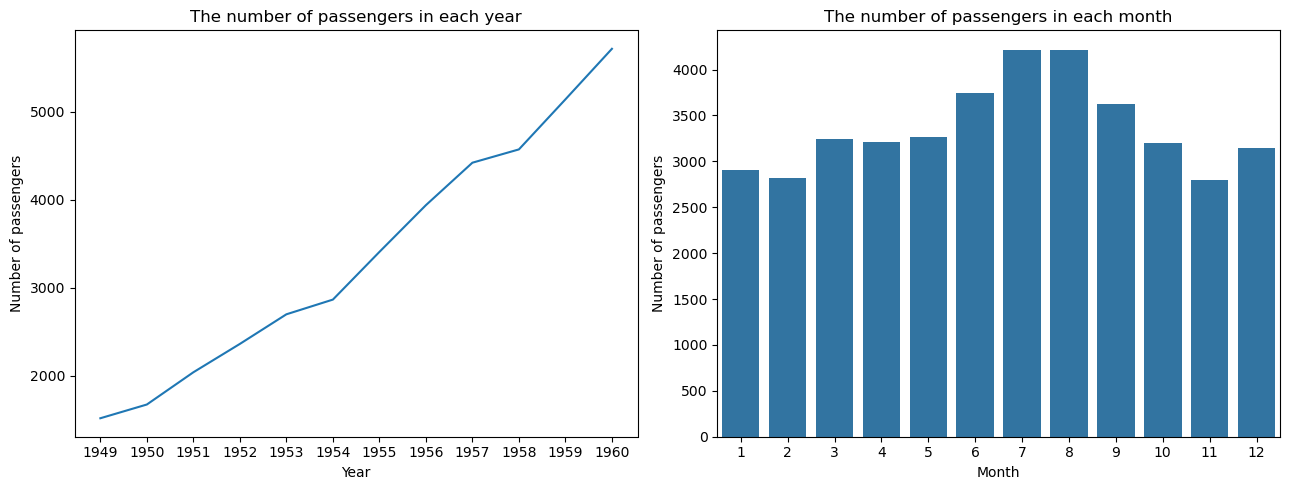

In [59]:
sns.set_style()

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot the yearly data using seaborn
sns.lineplot(data=data1, x=data1.index, y="passengers", ax=ax[0])
ax[0].set_title('The number of passengers in each year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of passengers')
ax[0].set_xticks(data1.index)  # Set x-ticks to be the years

# Plot the monthly data using seaborn
sns.barplot(data=data2.reset_index(), x="month", y="passengers", ax=ax[1],color='#1f77b4')
ax[1].set_title('The number of passengers in each month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of passengers')
ax[1].set_xticklabels(range(1, 13))  # Set x-ticks to be the numbers of the months

# Improve layout and display the plot
plt.tight_layout()
plt.show()

### 答案

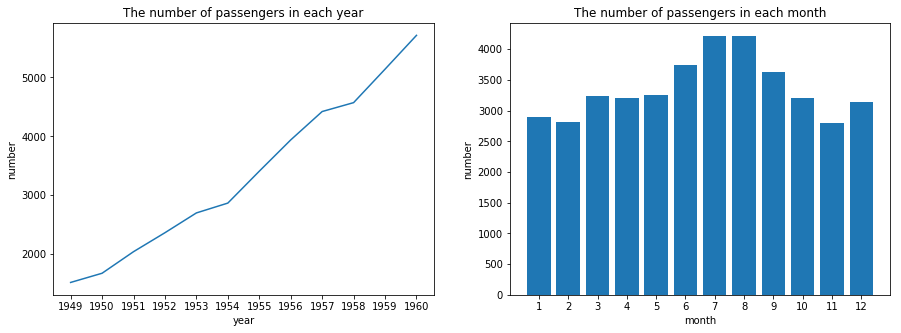

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [2]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### matplotlib

#### 1.萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

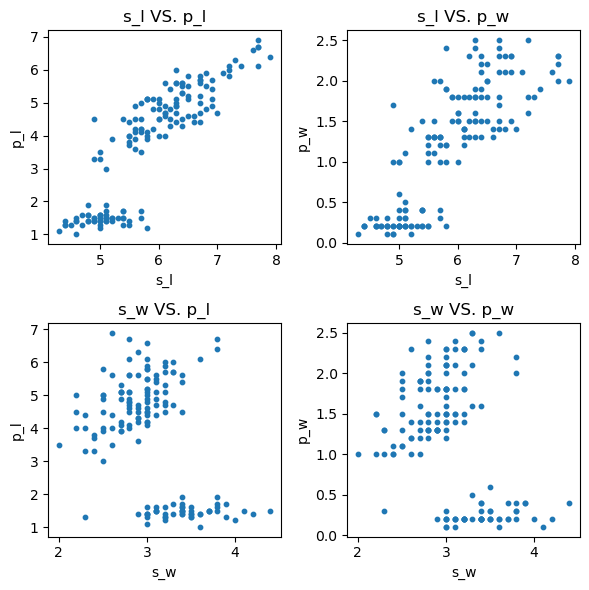

In [7]:
# Relationship between the size of sepals and petals (hint: scatter plot)
fig, ax = plt.subplots(2, 2, figsize=(6,6))

ax[0,0].scatter(data["sepal_length"].values, data["petal_length"].values, s=10)
ax[0,0].set_title("s_l VS. p_l")
ax[0,0].set_xlabel("s_l")
ax[0,0].set_ylabel("p_l")

ax[0,1].scatter(data["sepal_length"].values, data["petal_width"].values, s=10)
ax[0,1].set_title("s_l VS. p_w")
ax[0,1].set_xlabel("s_l")
ax[0,1].set_ylabel("p_w")

ax[1,0].scatter(data["sepal_width"].values, data["petal_length"].values, s=10)
ax[1,0].set_title("s_w VS. p_l")
ax[1,0].set_xlabel("s_w")
ax[1,0].set_ylabel("p_l")

ax[1,1].scatter(data["sepal_width"].values, data["petal_width"].values, s=10)
ax[1,1].set_title("s_w VS. p_w")
ax[1,1].set_xlabel("s_w")
ax[1,1].set_ylabel("p_w")

plt.tight_layout()
plt.show()



# fig, ax = plt.subplots(2, 2, figsize=(6, 6))
# color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

# # Define the feature combinations
# features = [('sepal_length', 'petal_length', 's_l VS. p_l'), ('sepal_length', 'petal_width', 's_l VS. p_w'), ('sepal_width', 'petal_length', 's_w VS. p_l'), ('sepal_width', 'petal_width', 's_w VS. p_w')]

# # Create scatter plots for various feature comparisons
# for i in range(2):
#     for j in range(2):
#         x_feature, y_feature, title = features[i*2 + j]
#         ax[i, j].scatter(data[x_feature].values, data[y_feature].values, s=10, c=data["species"].map(color_map))
#         ax[i, j].set_title(title)
#         ax[i, j].set_xlabel(x_feature.replace('_', ' ').title())
#         ax[i, j].set_ylabel(y_feature.replace('_', ' ').title())

# # Adjust layout for better fit and display the plot
# plt.tight_layout()
# plt.show()


#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

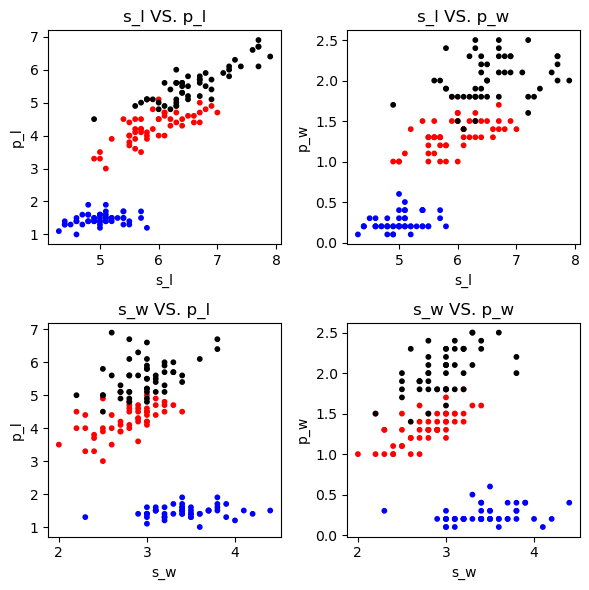

In [6]:
# Relationship between the sizes of sepals and petals in different species of iris flowers (Hint: box plot or violin plot)
fig, ax = plt.subplots(2, 2, figsize=(6,6))
color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

ax[0,0].scatter(data["sepal_length"].values, data["petal_length"].values, s=10,c=data["species"].map(color_map))
ax[0,0].set_title("s_l VS. p_l")
ax[0,0].set_xlabel("s_l")
ax[0,0].set_ylabel("p_l")

ax[0,1].scatter(data["sepal_length"].values, data["petal_width"].values, s=10,c=data["species"].map(color_map))
ax[0,1].set_title("s_l VS. p_w")
ax[0,1].set_xlabel("s_l")
ax[0,1].set_ylabel("p_w")

ax[1,0].scatter(data["sepal_width"].values, data["petal_length"].values, s=10,c=data["species"].map(color_map))
ax[1,0].set_title("s_w VS. p_l")
ax[1,0].set_xlabel("s_w")
ax[1,0].set_ylabel("p_l")

ax[1,1].scatter(data["sepal_width"].values, data["petal_width"].values, s=10,c=data["species"].map(color_map))
ax[1,1].set_title("s_w VS. p_w")
ax[1,1].set_xlabel("s_w")
ax[1,1].set_ylabel("p_w")

plt.tight_layout()
plt.show()



# fig, ax = plt.subplots(2, 2, figsize=(6, 6))
# color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

# # Define the feature combinations
# features = [('sepal_length', 'petal_length', 's_l VS. p_l'), ('sepal_length', 'petal_width', 's_l VS. p_w'), ('sepal_width', 'petal_length', 's_w VS. p_l'), ('sepal_width', 'petal_width', 's_w VS. p_w')]

# # Create scatter plots for various feature comparisons
# for i in range(2):
#     for j in range(2):
#         x_feature, y_feature, title = features[i*2 + j]
#         ax[i, j].scatter(data[x_feature].values, data[y_feature].values, s=10, c=data["species"].map(color_map))
#         ax[i, j].set_title(title)
#         ax[i, j].set_xlabel(x_feature.replace('_', ' ').title())
#         ax[i, j].set_ylabel(y_feature.replace('_', ' ').title())

# # Adjust layout for better fit and display the plot
# plt.tight_layout()
# plt.show()


#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

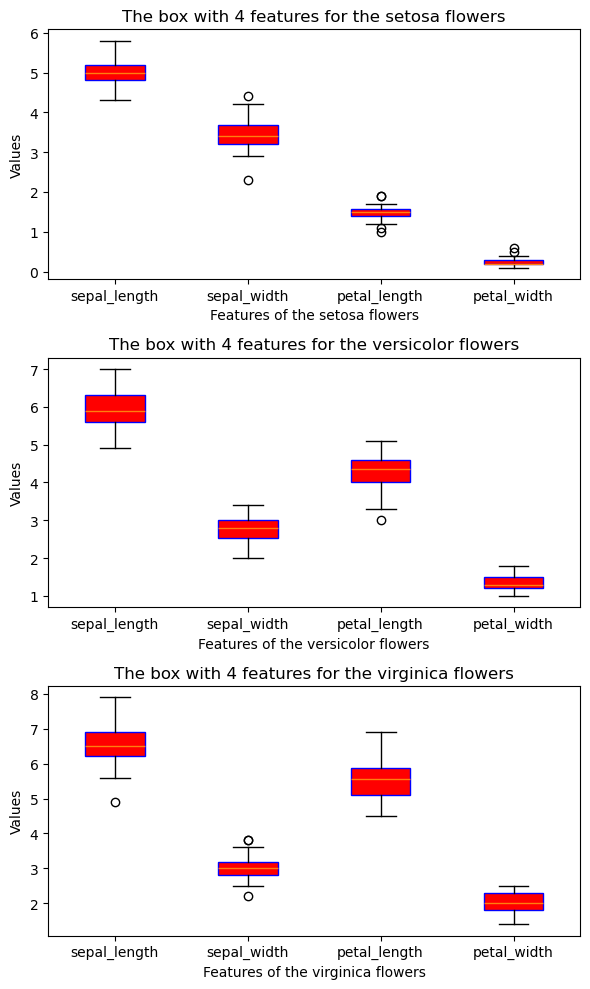

In [32]:
species_list = data['species'].unique()

fig, ax = plt.subplots(3, 1, figsize=(6, 10))

for i,specie in enumerate(species_list):
    data_1 = data[data["species"] == specie][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ax[i].boxplot(data_1, 
                  patch_artist=True, 
                  boxprops=dict(facecolor='red', color='blue'))
    ax[i].set_title(f'The box with 4 features for the {specie} flowers')
    ax[i].set_xlabel(f'Features of the {specie} flowers')
    ax[i].set_ylabel('Values')
    ax[i].set_xticklabels(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.tight_layout()
plt.show()

### seaborn

#### 1.萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

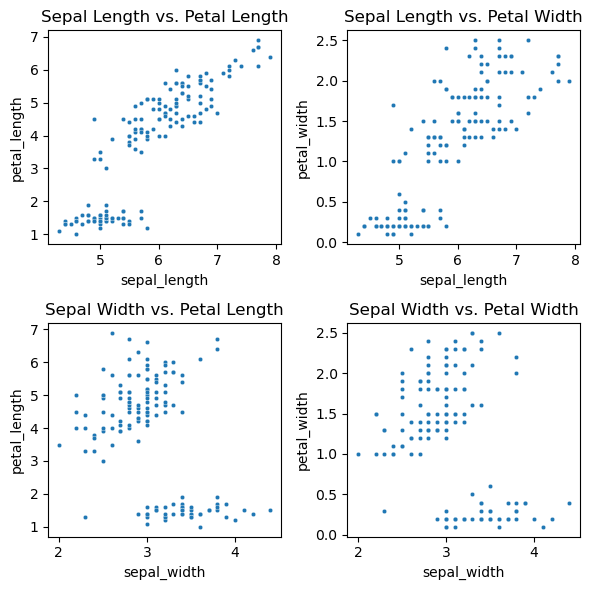

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

# Create scatter plots for various feature comparisons using seaborn
sns.scatterplot(x='sepal_length', y='petal_length', data=data, ax=ax[0, 0], s=10)
ax[0, 0].set_title("Sepal Length vs. Petal Length")

sns.scatterplot(x='sepal_length', y='petal_width', data=data, ax=ax[0, 1], s=10)
ax[0, 1].set_title("Sepal Length vs. Petal Width")

sns.scatterplot(x='sepal_width', y='petal_length', data=data, ax=ax[1, 0], s=10)
ax[1, 0].set_title("Sepal Width vs. Petal Length")

sns.scatterplot(x='sepal_width', y='petal_width', data=data, ax=ax[1, 1], s=10)
ax[1, 1].set_title("Sepal Width vs. Petal Width")

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()



# fig, ax = plt.subplots(2, 2, figsize=(6, 6))
# color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

# # Define the feature combinations
# features = [('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_width', 'petal_length'), ('sepal_width', 'petal_width')]

# # Create scatter plots for various feature comparisons using seaborn
# for i in range(2):
#     for j in range(2):
#         x_feature, y_feature = features[i*2 + j]
#         plot_title = f"{x_feature.replace('_', ' ').title()} vs. {y_feature.replace('_', ' ').title()}"
#         sns.scatterplot(x=x_feature, y=y_feature, data=data, ax=ax[i, j], s=10, c=data["species"].map(color_map))
#         ax[i, j].set_title(plot_title)

# # Adjust layout for better fit and display the plot
# plt.tight_layout()
# plt.show()

#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

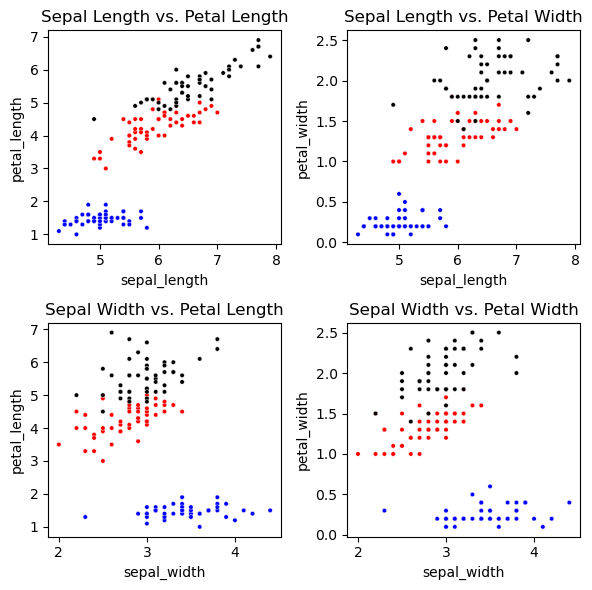

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

# Create scatter plots for various feature comparisons using seaborn
sns.scatterplot(x='sepal_length', y='petal_length', data=data, ax=ax[0, 0], s=10,c=data["species"].map(color_map))
ax[0, 0].set_title("Sepal Length vs. Petal Length")

sns.scatterplot(x='sepal_length', y='petal_width', data=data, ax=ax[0, 1], s=10,c=data["species"].map(color_map))
ax[0, 1].set_title("Sepal Length vs. Petal Width")

sns.scatterplot(x='sepal_width', y='petal_length', data=data, ax=ax[1, 0], s=10,c=data["species"].map(color_map))
ax[1, 0].set_title("Sepal Width vs. Petal Length")

sns.scatterplot(x='sepal_width', y='petal_width', data=data, ax=ax[1, 1], s=10,c=data["species"].map(color_map))
ax[1, 1].set_title("Sepal Width vs. Petal Width")

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()



# fig, ax = plt.subplots(2, 2, figsize=(6, 6))
# color_map = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'black'}

# # Define the feature combinations
# features = [('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_width', 'petal_length'), ('sepal_width', 'petal_width')]

# # Create scatter plots for various feature comparisons using seaborn
# for i in range(2):
#     for j in range(2):
#         x_feature, y_feature = features[i*2 + j]
#         plot_title = f"{x_feature.replace('_', ' ').title()} vs. {y_feature.replace('_', ' ').title()}"
#         sns.scatterplot(x=x_feature, y=y_feature, data=data, ax=ax[i, j], s=10, c=data["species"].map(color_map))
#         ax[i, j].set_title(plot_title)

# # Adjust layout for better fit and display the plot
# plt.tight_layout()
# plt.show()

#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

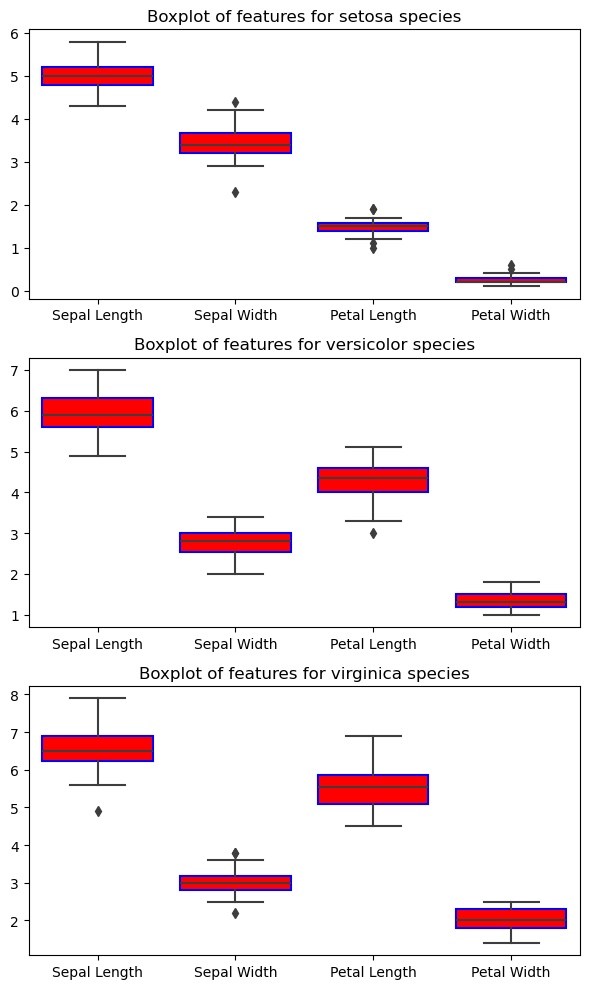

In [31]:
species_list = data['species'].unique()

fig, ax = plt.subplots(3, 1, figsize=(6, 10))

for i, species in enumerate(species_list):
    data_species = data[data["species"] == species]
    sns.boxplot(data=data_species, 
                ax=ax[i],
                boxprops=dict(facecolor='red', edgecolor='blue'))
    ax[i].set_title(f'Boxplot of features for {species} species')
    ax[i].set_xticklabels(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

plt.tight_layout()
plt.show()

### 答案

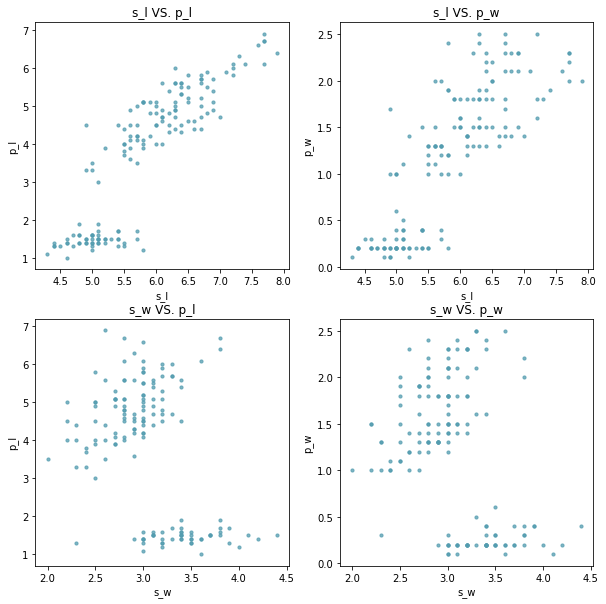

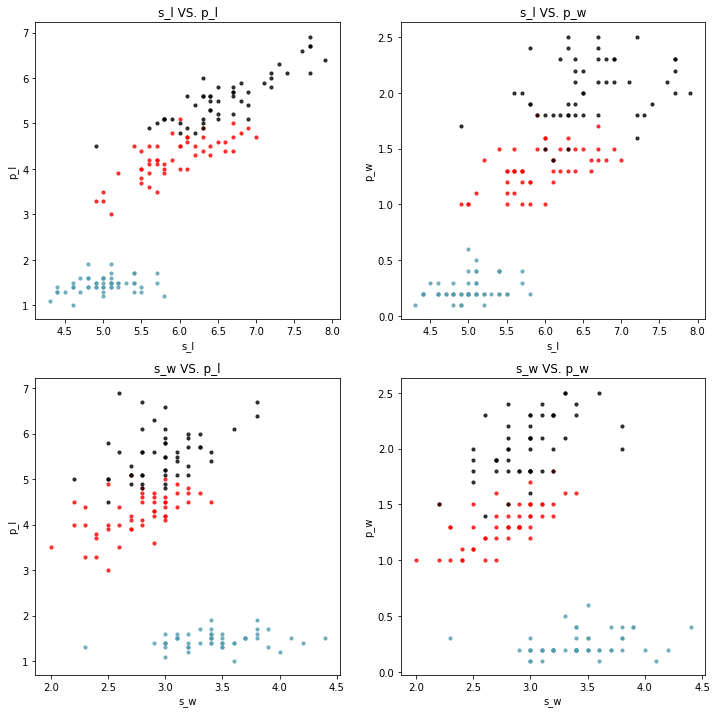

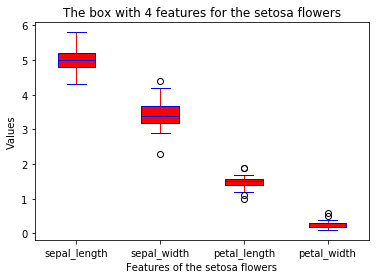

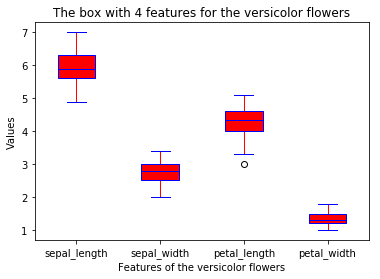

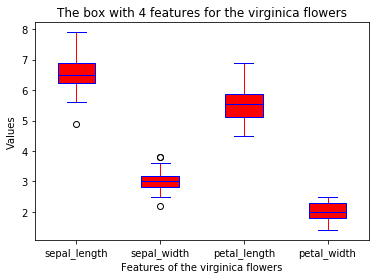

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [2]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### matplotlib

#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

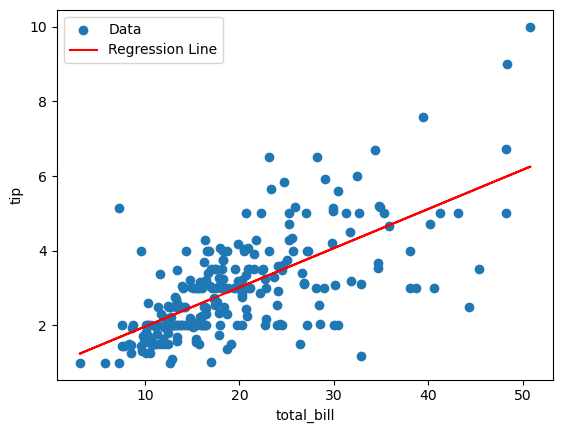

In [36]:
from scipy import stats

x = data["total_bill"].values
y = data["tip"].values

# 执行线性回归分析
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 创建回归线的 x 和 y 值
regression_line = slope * x + intercept

# 绘制散点图和回归线
plt.scatter(x, y, label='Data')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.legend()
plt.show()

总体来看，总消费越高，给的小费也越高

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

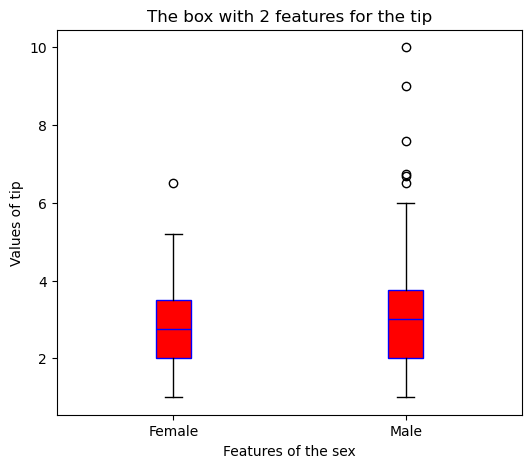

In [21]:
grouped_data = [data[data['sex'] == 'Female']['tip'], data[data['sex'] == 'Male']['tip']]

fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(grouped_data,
           labels = ["Female","Male"],
           patch_artist = True,
           boxprops=dict(facecolor='red', color='blue'),
           medianprops=dict(color='blue'))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the sex')
ax.set_ylabel('Values of tip')

从图中可以看到，男性小费的中间值比女性要高一些，所以男性更慷慨一点

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

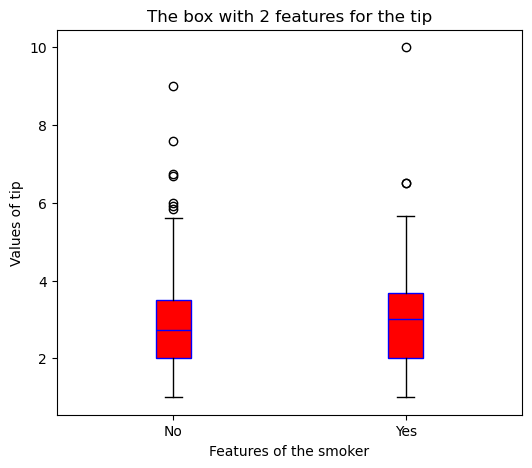

In [23]:
grouped_data = [data[data['smoker'] == 'No']['tip'], data[data['smoker'] == 'Yes']['tip']]

fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(grouped_data,
           labels = ["No","Yes"],
           patch_artist = True,
           boxprops=dict(facecolor='red', color='blue'),
           medianprops=dict(color='blue'))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the smoker')
ax.set_ylabel('Values of tip')

从图中可以看到，吸烟的中位数偏高，说明吸烟的给的小费更高一点，而且看着范围更大，给的更随意

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

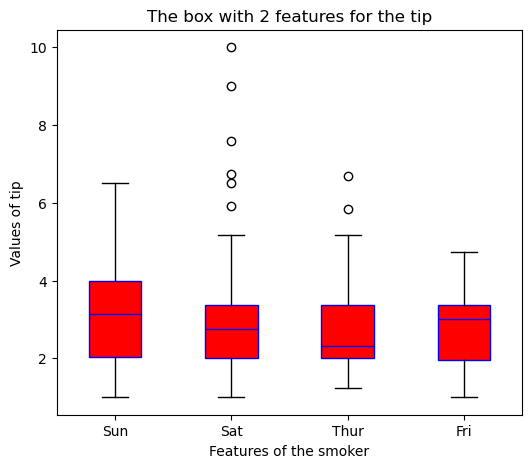

In [30]:
day_list = data['day'].unique()
grouped_data = []

for day in day_list:
    grouped_data.append(data[data['day'] == day]['tip'])

fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(grouped_data,
           labels = day_list,
           patch_artist = True,
           boxprops=dict(facecolor='red', color='blue'),
           medianprops=dict(color='blue'))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the day')
ax.set_ylabel('Values of tip')

周四到周天的小费比例中位数区别不大，节假日的周六周天人们给小费更加随意一点。而这两天也更容易出现高到离谱的小费比例，

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

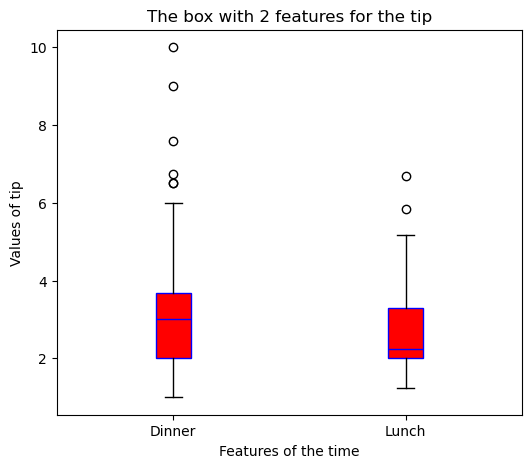

In [32]:
day_list = data['time'].unique()
grouped_data = []

for day in day_list:
    grouped_data.append(data[data['time'] == day]['tip'])

fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(grouped_data,
           labels = day_list,
           patch_artist = True,
           boxprops=dict(facecolor='red', color='blue'),
           medianprops=dict(color='blue'))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the time')
ax.set_ylabel('Values of tip')

从用餐时段来看，午餐的小费比例范围较窄，晚餐时段的小费比例随意性较大，这可能是由于晚餐时段用餐时长更长、餐费更高、很可能用了酒类饮料，使得小费比例较高。

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

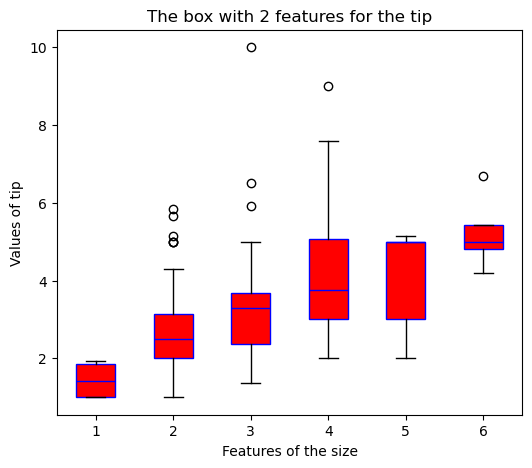

In [49]:
day_list = data['size'].unique()
day_list.sort()
grouped_data = []

for day in day_list:
    grouped_data.append(data[data['size'] == day]['tip'])

fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(grouped_data,
           labels = day_list,
           patch_artist = True,
           boxprops=dict(facecolor='red', color='blue'),
           medianprops=dict(color='blue'))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the size')
ax.set_ylabel('Values of tip')

小费随着认数的增多而增多

#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

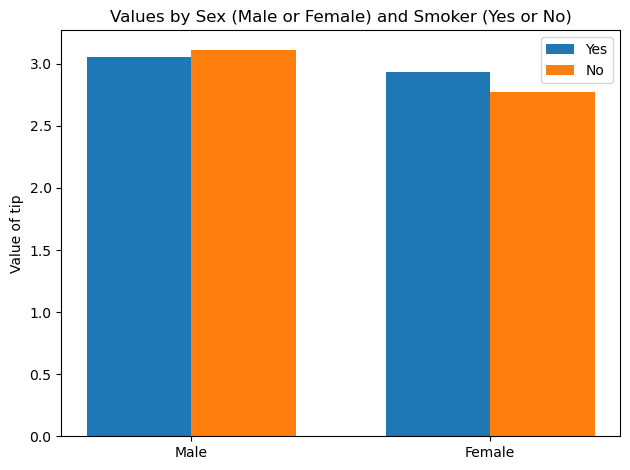

In [87]:

# Sample data
categories = ['Male', 'Female']
values_yes = [data[(data['smoker'] == 'Yes') & (data['sex'] == 'Male')]['tip'].agg("mean"),data[(data['smoker'] == 'Yes') & (data['sex'] == 'Female')]['tip'].agg("mean")]
values_no = [data[(data['smoker'] == 'No') & (data['sex'] == 'Male')]['tip'].agg("mean"),data[(data['smoker'] == 'No') & (data['sex'] == 'Female')]['tip'].agg("mean")]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Create bars for 'Yes' and 'No'
bars1 = ax.bar(x - width/2, values_yes, width, label='Yes')
bars2 = ax.bar(x + width/2, values_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value of tip')
ax.set_title('Values by Sex (Male or Female) and Smoker (Yes or No)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()

plt.show()


### seaborn

#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

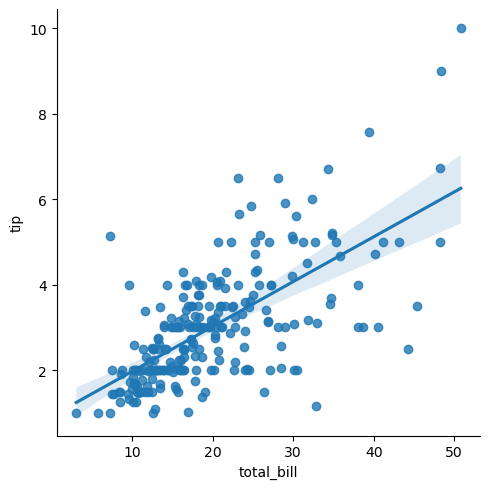

In [37]:
sns.lmplot(x='total_bill', y='tip', data=data)

# 显示图形
plt.show()

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

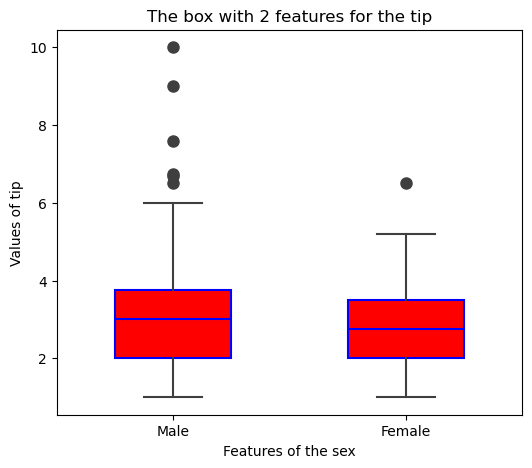

In [20]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(x='sex', y='tip', data=data,width=0.5,
            boxprops=dict(facecolor='r', edgecolor='b'),
            medianprops=dict(color='b'),
            flierprops=dict(marker='o', markersize=8))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the sex')
ax.set_ylabel('Values of tip')

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

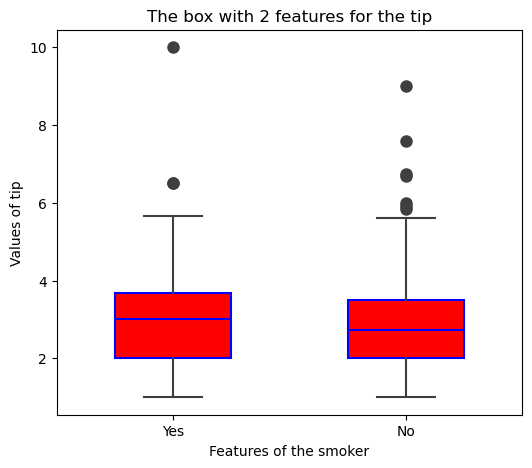

In [24]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(x='smoker', y='tip', data=data,width=0.5,
            boxprops=dict(facecolor='r', edgecolor='b'),
            medianprops=dict(color='b'),
            flierprops=dict(marker='o', markersize=8))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the smoker')
ax.set_ylabel('Values of tip')

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

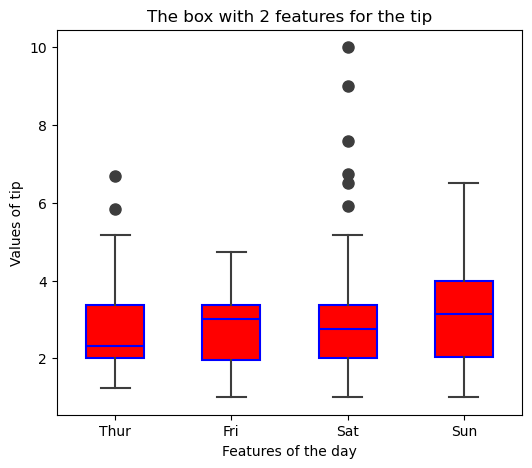

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(x='day', y='tip', data=data,width=0.5,
            boxprops=dict(facecolor='r', edgecolor='b'),
            medianprops=dict(color='b'),
            flierprops=dict(marker='o', markersize=8))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the day')
ax.set_ylabel('Values of tip')

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

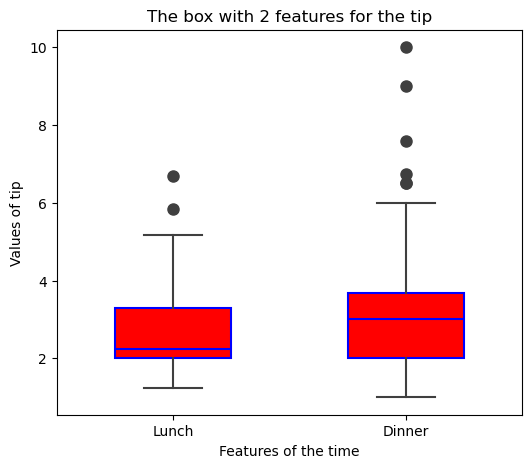

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(x='time', y='tip', data=data,width=0.5,
            boxprops=dict(facecolor='r', edgecolor='b'),
            medianprops=dict(color='b'),
            flierprops=dict(marker='o', markersize=8))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the time')
ax.set_ylabel('Values of tip')

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

Text(0, 0.5, 'Values of tip')

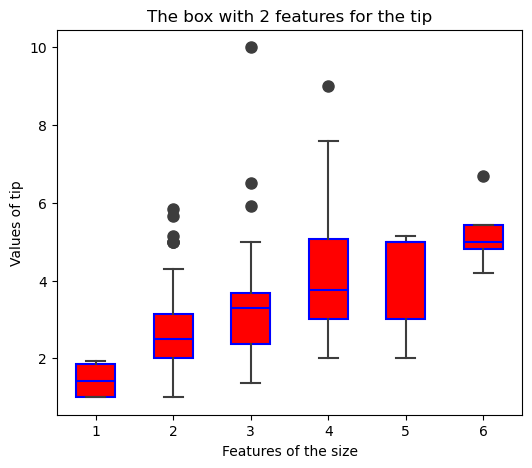

In [50]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(x='size', y='tip', data=data,width=0.5,
            boxprops=dict(facecolor='r', edgecolor='b'),
            medianprops=dict(color='b'),
            flierprops=dict(marker='o', markersize=8))

ax.set_title('The box with 2 features for the tip')
ax.set_xlabel('Features of the size')
ax.set_ylabel('Values of tip')

#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

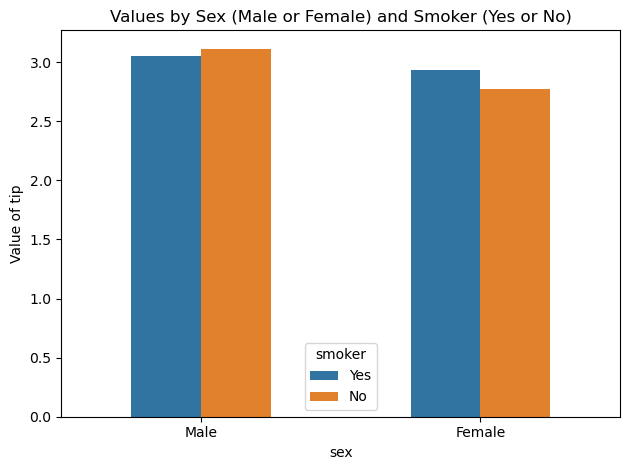

In [90]:
fig, ax = plt.subplots()

# Create a bar plot showing the value of tips by sex and smoker status
sns.barplot(x="sex", y="tip", hue="smoker", data=data, ci=None,width=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value of tip')
ax.set_title('Values by Sex (Male or Female) and Smoker (Yes or No)')

plt.tight_layout()
plt.show()

### 答案

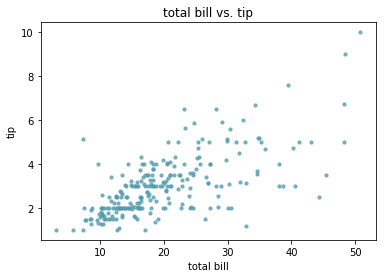

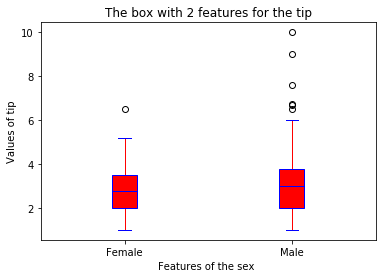

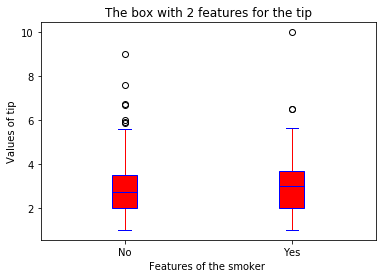

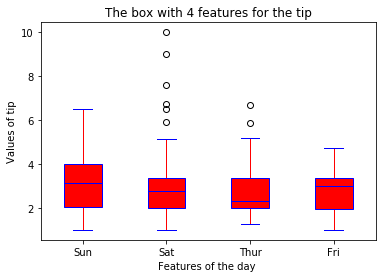

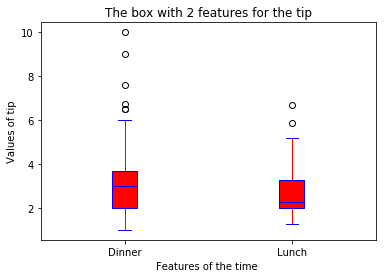

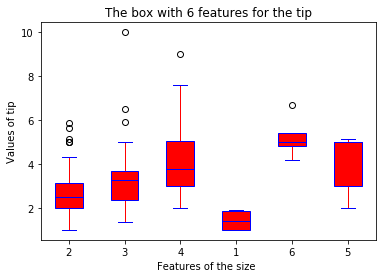

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


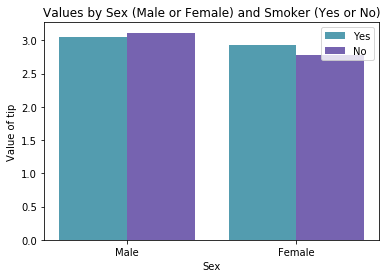

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [ ]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

### matplotlib

#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

,pclass,survived,unsuvived,total,survived_prop,unsurvived_prop
0,1,136,80,216,0.629630,0.370370
1,2,87,97,184,0.472826,0.527174
2,3,119,372,491,0.242363,0.757637


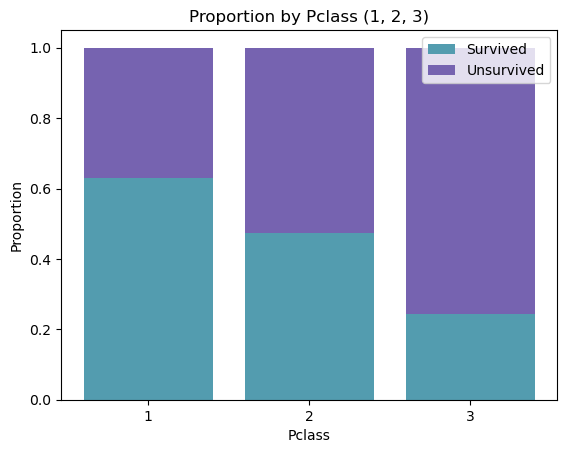

In [187]:
x_data = np.sort(data["pclass"].unique())

data_unsurvived = []
data_survived = []

for i in range(1,4,1):
    data_unsurvived.append(data[(data["survived"] == 0) & (data["pclass"] == i)]["survived"].agg("count"))
    
for i in range(1,4,1):
    data_survived.append(data[(data["survived"] == 1) & (data["pclass"] == i)]["survived"].agg("count"))
    
data_unsurvived = np.array(data_unsurvived)
data_survived = np.array(data_survived)
data_sum = data_unsurvived + data_survived
data_unsurvived_prop = data_unsurvived/data_sum
data_survived_prop = data_survived/data_sum
    
y_data_list = [data_survived_prop,data_unsurvived_prop]

colors = ['#539caf', '#7663b0']
y_data_names = ['Survived', 'Unsurvived']

_, ax = plt.subplots()
# 循环绘制堆积柱状图
for i in range(0, len(y_data_list)):
    if i == 0:
        ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
    else:
        # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
        # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
        ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
ax.set_xlabel('Pclass')
ax.set_ylabel('Proportion')
ax.set_title('Proportion by Pclass (1, 2, 3)')
ax.set_xticks([1,2,3])
ax.legend(loc = 'upper right') # 设定图例位置

pd.DataFrame({"pclass": x_data,
              "survived": data_survived,
              "unsuvived": data_unsurvived,
              "total": data_sum,
              "survived_prop": data_survived_prop,
              "unsurvived_prop": data_unsurvived_prop
              })

从图中可以看到，仓位等级越高，幸存者比例越高

#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

,sex,survived,unsuvived,total,survived_prop,unsurvived_prop
0,male,109,468,577,0.188908,0.811092
1,female,233,81,314,0.742038,0.257962


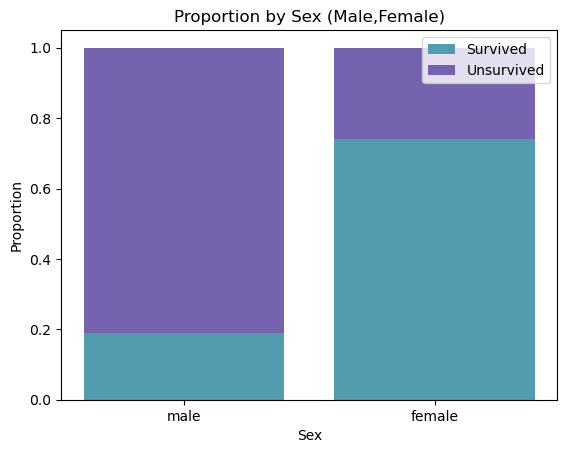

In [188]:
x_data = data["sex"].unique()

data_unsurvived = []
data_survived = []

for sex in x_data:
    data_unsurvived.append(data[(data["survived"] == 0) & (data["sex"] == sex)]["survived"].agg("count"))
    
for sex in x_data:
    data_survived.append(data[(data["survived"] == 1) & (data["sex"] == sex)]["survived"].agg("count"))
    
data_unsurvived = np.array(data_unsurvived)
data_survived = np.array(data_survived)
data_sum = data_unsurvived + data_survived
data_unsurvived_prop = data_unsurvived/data_sum
data_survived_prop = data_survived/data_sum
    
y_data_list = [data_survived_prop,data_unsurvived_prop]

colors = ['#539caf', '#7663b0']
y_data_names = ['Survived', 'Unsurvived']

_, ax = plt.subplots()
# 循环绘制堆积柱状图
for i in range(0, len(y_data_list)):
    if i == 0:
        ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
    else:
        # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
        # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
        ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
ax.set_xlabel('Sex')
ax.set_ylabel('Proportion')
ax.set_title('Proportion by Sex (Male,Female)')
# ax.set_xticks([1,2,3])
ax.legend(loc = 'upper right') # 设定图例位置

pd.DataFrame({"sex": x_data,
              "survived": data_survived,
              "unsuvived": data_unsurvived,
              "total": data_sum,
              "survived_prop": data_survived_prop,
              "unsurvived_prop": data_unsurvived_prop
              })

从图中可以看到，女性幸存的比例比男性高很多，可以推测到遇到灾难时，会优先保护女性

#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

Text(0, 0.5, 'fare')

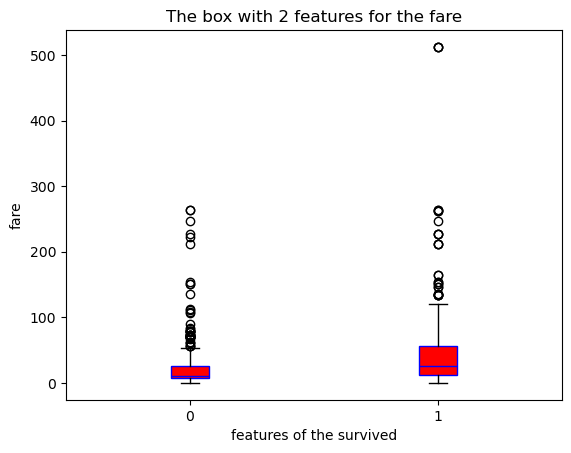

In [205]:
data_fare = [data[data["survived"] == 0]["fare"].values,data[data["survived"] == 1]["fare"].values]

fig, ax = plt.subplots()
ax.boxplot(data_fare,labels = ["0","1"],
           patch_artist = True,
           boxprops = dict(facecolor='r', color = 'b'),
           medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the fare")
ax.set_xlabel("features of the survived")
ax.set_ylabel("fare")



从图中可以看出，幸存者的票价会更高

#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

Text(0, 0.5, 'age')

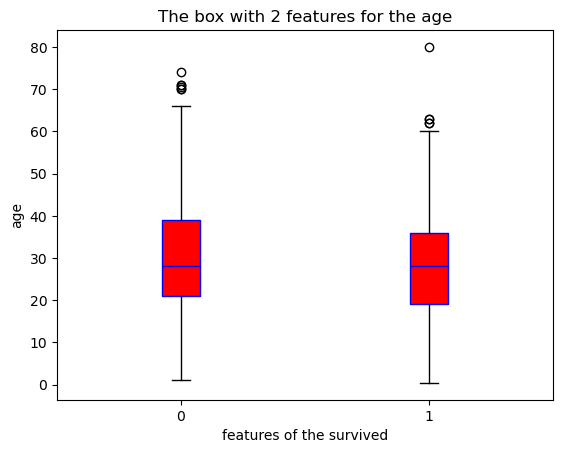

In [219]:
data_age_unsurvived = data[data["survived"] == 0]["age"].values
data_age_survived = data[data["survived"] == 1]["age"].values
data_age_unsurvived = data_age_unsurvived[~np.isnan(data_age_unsurvived)]
data_age_survived = data_age_survived[~np.isnan(data_age_survived)]
data_age = [data_age_unsurvived,data_age_survived]

fig, ax = plt.subplots()
ax.boxplot(data_age,labels = ["0","1"],
           patch_artist = True,
           boxprops = dict(facecolor='r', color = 'b'),
           medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the age")
ax.set_xlabel("features of the survived")
ax.set_ylabel("age")



#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

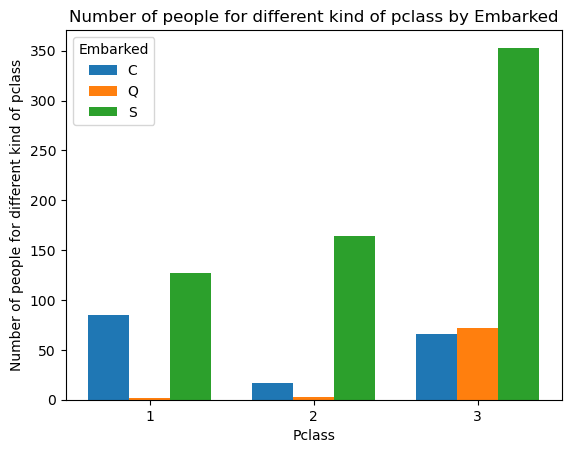

In [13]:


pclass = data["pclass"].values
embarked = data["embarked"].values


# Preparing the data for stacked bar plot
embarked_counts = {e: [np.sum((pclass == i) & (embarked == e)) for i in range(1, 4)] for e in ['C', 'Q', 'S']}


# Define the plot
fig, ax = plt.subplots()

bar_width = 0.25

# Define the positions of the bars
positions = np.array(range(len(embarked_counts['C'])))

# Plotting the bar plot
for i, (embark, counts) in enumerate(embarked_counts.items()):
    ax.bar(positions + i * bar_width, counts, width=bar_width, label=embark)

# Adding labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of people for different kind of pclass')
ax.set_title('Number of people for different kind of pclass by Embarked')
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(['1', '2', '3'])
ax.legend(title='Embarked')

# Show the plot
plt.show()


#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

Text(0, 0.5, 'fare')

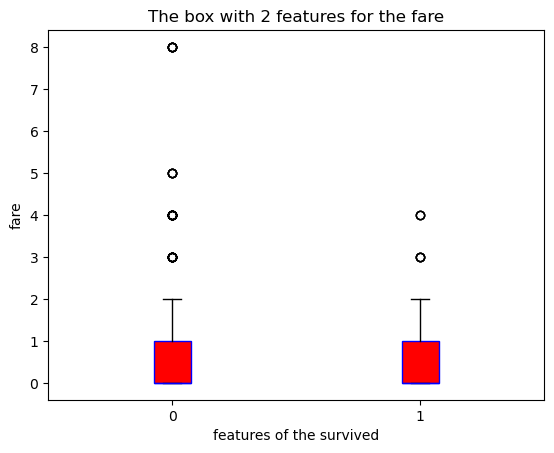

In [222]:
data_fare = [data[data["survived"] == 0]["sibsp"].values,data[data["survived"] == 1]["sibsp"].values]

fig, ax = plt.subplots()
ax.boxplot(data_fare,labels = ["0","1"],
           patch_artist = True,
           boxprops = dict(facecolor='r', color = 'b'),
           medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the sibsp")
ax.set_xlabel("features of the survived")
ax.set_ylabel("sibsp")



#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

Text(0, 0.5, 'parch')

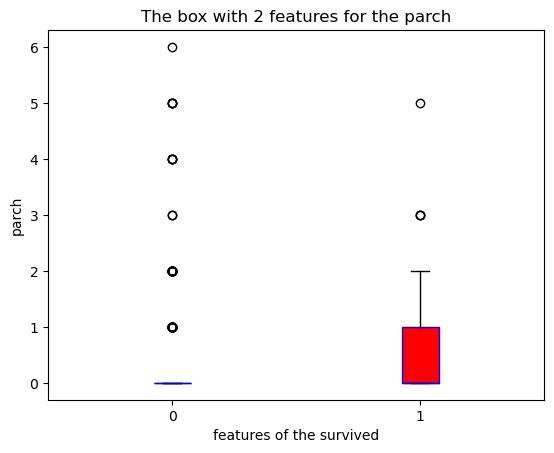

In [223]:
data_fare = [data[data["survived"] == 0]["parch"].values,data[data["survived"] == 1]["parch"].values]

fig, ax = plt.subplots()
ax.boxplot(data_fare,labels = ["0","1"],
           patch_artist = True,
           boxprops = dict(facecolor='r', color = 'b'),
           medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the parch")
ax.set_xlabel("features of the survived")
ax.set_ylabel("parch")



#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

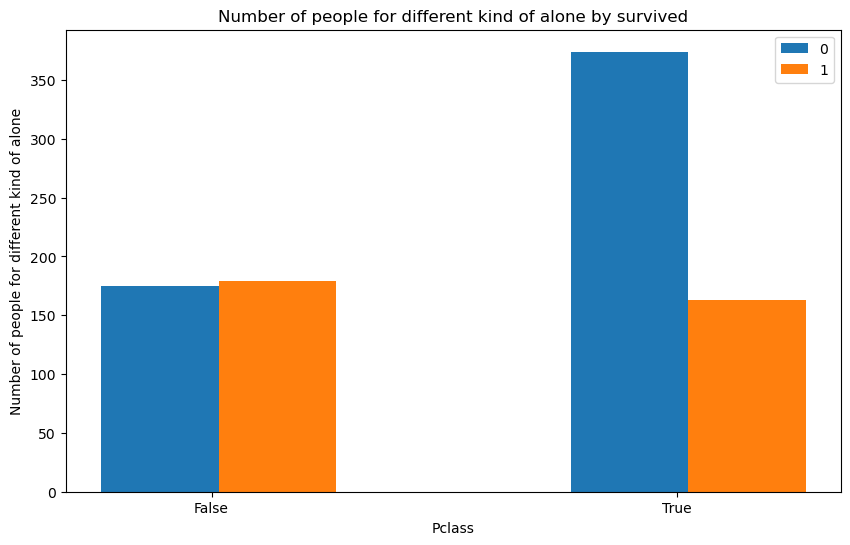

In [37]:
data1 = data.copy()
data1.loc[data1["alone"] == False, "alone"] = "False"
data1.loc[data1["alone"] == True, "alone"] = "True"

data1.loc[data1["survived"] == 0, "survived"] = "0"
data1.loc[data1["survived"] == 1, "survived"] = "1"

alone = data1["alone"].values
survived = data1["survived"].values


# Preparing the data for stacked bar plot
survived_counts = {s: [np.sum((alone == i) & (survived == s)) for i in ["False","True"]] for s in ["0","1"]}


# Define the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25


# Define the positions of the bars
positions = np.array(range(len(survived_counts["0"])))

# Plotting the bar plot
for i, (survived, counts) in enumerate(survived_counts.items()):
    ax.bar(positions + i * bar_width, counts, width=bar_width, label=survived)

# Adding labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of people for different kind of alone')
ax.set_title('Number of people for different kind of alone by survived')
ax.set_xticks(positions + bar_width)
# ax.set_xticklabels(["False","True"])
ax.set_xticks([0.11,1.1],["False","True"])
ax.legend()


# Show the plot
plt.show()


### seaborn

#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

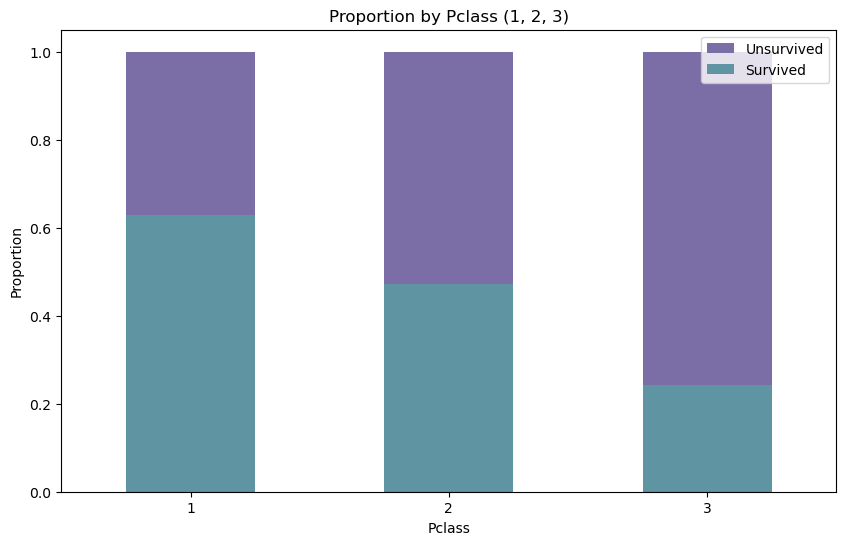

In [186]:

# Calculating the proportions
prop_data = data.groupby('pclass')['survived'].value_counts(normalize=True).unstack()
prop_data.columns = ['unsurvived', 'survived']

# Plotting with seaborn
fig,ax = plt.subplots(figsize=(10, 6))
width = 0.5
# Bottom bars (full height for each group)
sns.barplot(x=prop_data.index, y=prop_data['unsurvived'] + prop_data['survived'], color='#7663b0', label='Unsurvived',width=width)

# Top bars (proportion of survived)
sns.barplot(x=prop_data.index, y=prop_data['survived'], color='#539caf', label='Survived',width=width)

ax.set_xlabel('Pclass')
ax.set_ylabel('Proportion')
ax.set_title('Proportion by Pclass (1, 2, 3)')
plt.legend(loc='upper right')
plt.show()


#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

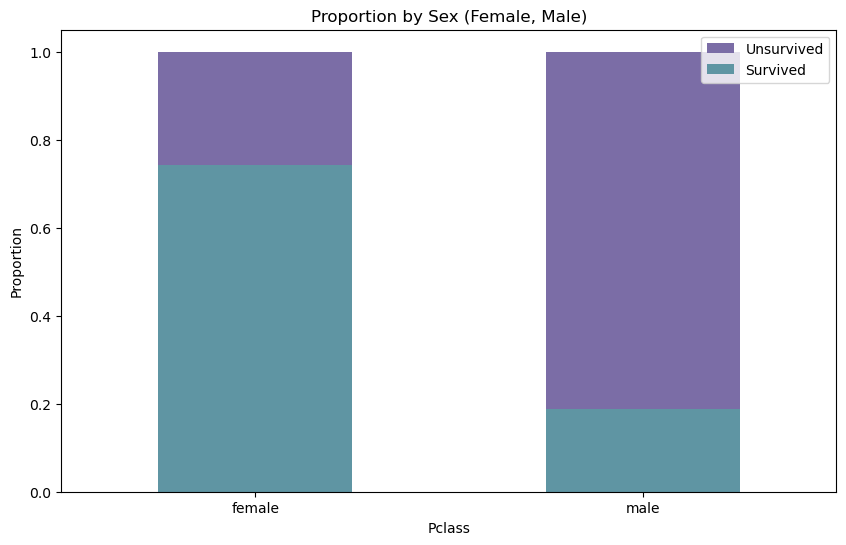

In [185]:

# Calculating the proportions
prop_data = data.groupby('sex')['survived'].value_counts(normalize=True).unstack()
prop_data.columns = ['unsurvived', 'survived']

# Plotting with seaborn
fig,ax = plt.subplots(figsize=(10, 6))
width = 0.5
# Bottom bars (full height for each group)
sns.barplot(x=prop_data.index, y=prop_data['unsurvived'] + prop_data['survived'], color='#7663b0', label='Unsurvived',width=width)

# Top bars (proportion of survived)
sns.barplot(x=prop_data.index, y=prop_data['survived'], color='#539caf', label='Survived',width=width)

ax.set_xlabel('Pclass')
ax.set_ylabel('Proportion')
ax.set_title('Proportion by Sex (Female, Male)')
plt.legend(loc='upper right')
plt.show()


#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

Text(0, 0.5, 'fare')

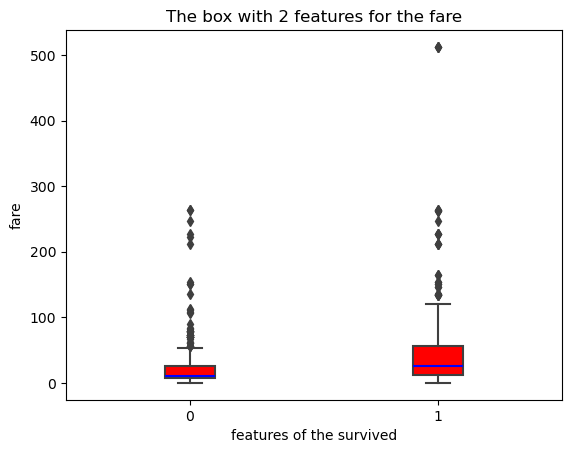

In [211]:

fig, ax = plt.subplots()
sns.boxplot(x=data["survived"],y=data["fare"],width=0.2,
            boxprops = dict(facecolor='r'),
            medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the fare")
ax.set_xlabel("features of the survived")
ax.set_ylabel("fare")

#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

Text(0, 0.5, 'age')

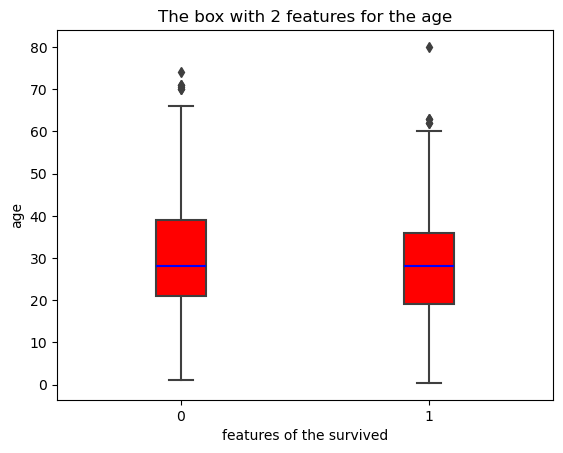

In [221]:

fig, ax = plt.subplots()
sns.boxplot(x=data["survived"],y=data["age"],width=0.2,
            boxprops = dict(facecolor='r'),
            medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the age")
ax.set_xlabel("features of the survived")
ax.set_ylabel("age")

#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

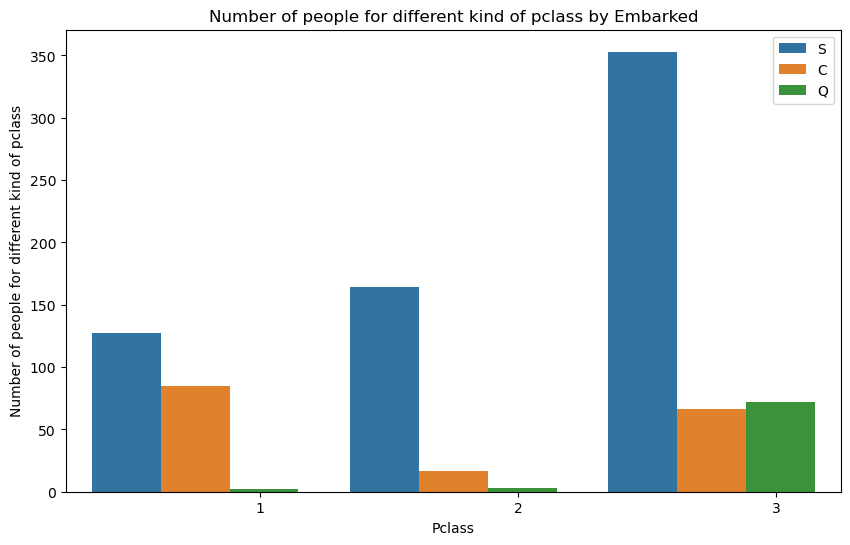

In [12]:
# Create a bar plot using seaborn
_,ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='pclass', hue='embarked', data=data)
# Adding labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of people for different kind of pclass')
ax.set_title('Number of people for different kind of pclass by Embarked')
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(['1', '2', '3'])
ax.legend(title='Embarked')

# Show the plot
plt.legend()
plt.show()

#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

Text(0, 0.5, 'sibsp')

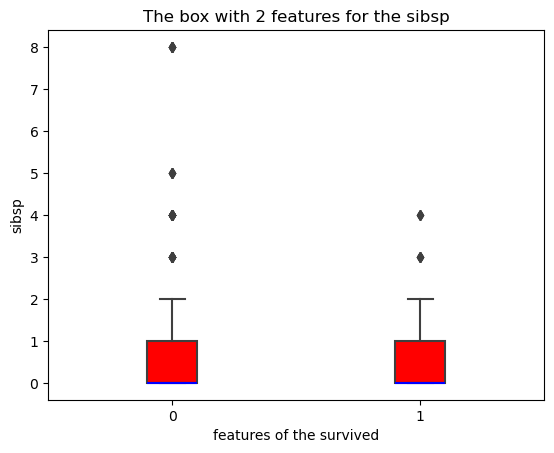

In [224]:

fig, ax = plt.subplots()
sns.boxplot(x=data["survived"],y=data["sibsp"],width=0.2,
            boxprops = dict(facecolor='r'),
            medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the sibsp")
ax.set_xlabel("features of the survived")
ax.set_ylabel("sibsp")

#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

Text(0, 0.5, 'parch')

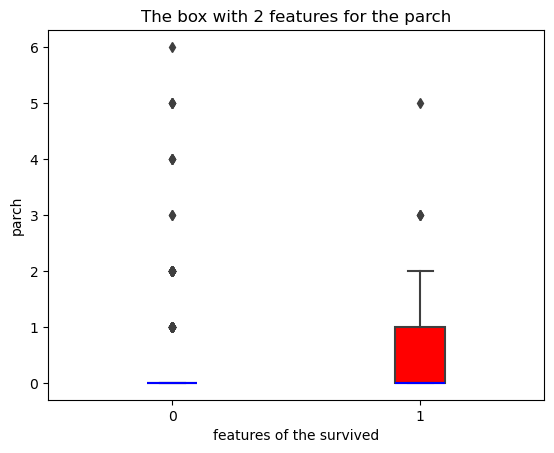

In [225]:

fig, ax = plt.subplots()
sns.boxplot(x=data["survived"],y=data["parch"],width=0.2,
            boxprops = dict(facecolor='r'),
            medianprops = dict(color='b'))
ax.set_title("The box with 2 features for the parch")
ax.set_xlabel("features of the survived")
ax.set_ylabel("parch")

#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

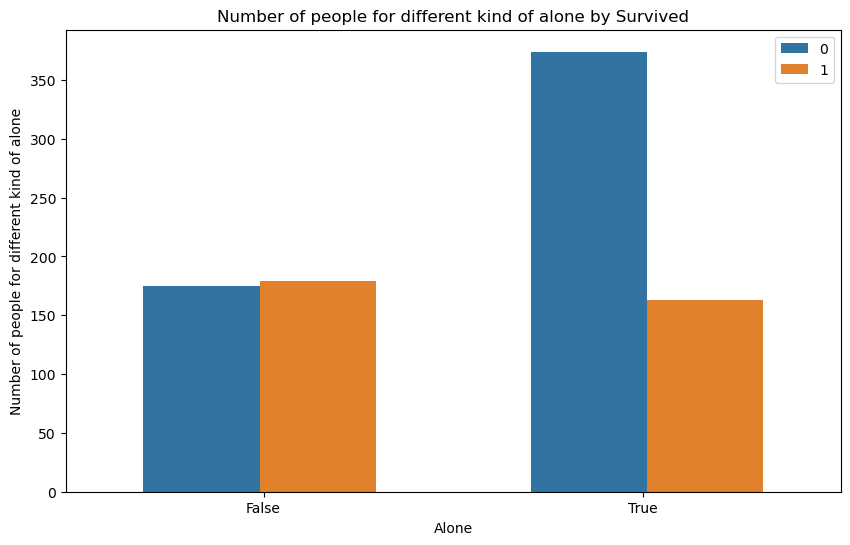

In [25]:
data1 = data.copy()
data1.loc[data1["alone"] == False, "alone"] = "False"
data1.loc[data1["alone"] == True, "alone"] = "True"

data1.loc[data1["survived"] == 0, "survived"] = "0"
data1.loc[data1["survived"] == 1, "survived"] = "1"

# Create a bar plot using seaborn
_,ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='alone', hue='survived', data=data1,
              width=0.6,
              )
# Adding labels and title
ax.set_xlabel('Alone')
ax.set_ylabel('Number of people for different kind of alone')
ax.set_title('Number of people for different kind of alone by Survived')
ax.set_xticks(positions + bar_width)
ax.set_xticks([0.01,0.99],["False","True"])
# ax.set_xticklabels(["False","True"])
ax.legend()

# Show the plot
plt.legend()
plt.show()

### 答案

        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


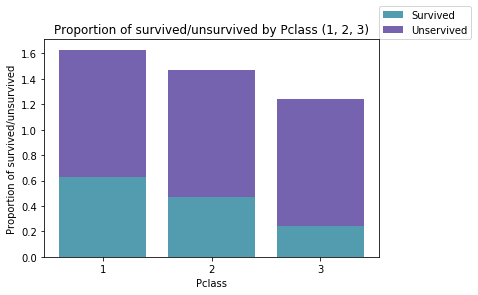

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


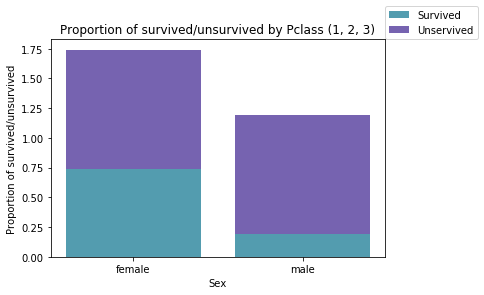

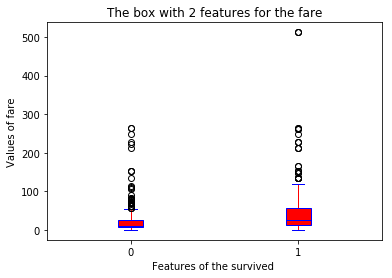

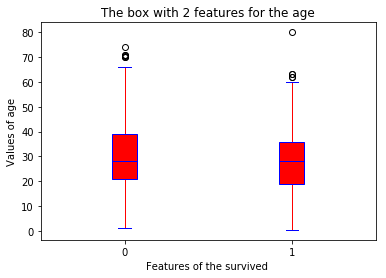

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


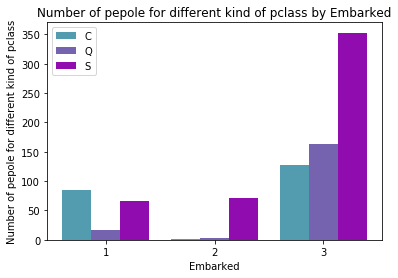

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

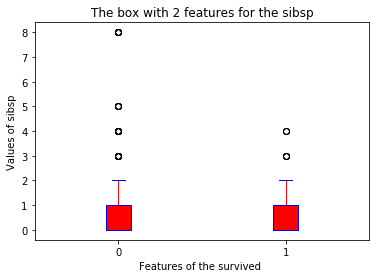

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

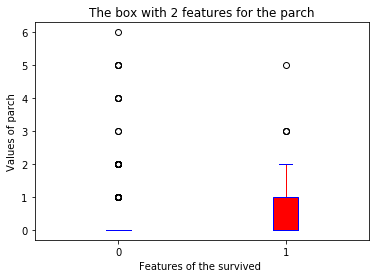

survived    0    1
alone             
False     175  179
True      374  163


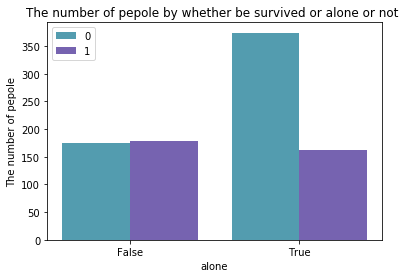